# Training classifiers from folders of images
When training pixel classifiers it often makes sense to train using multiple images. For example, when images look differently, especially between conditions, it is necessary to train classifiers with mutiple images from all conditions.

In this notebook we demonstrate how to train [APOC](https://github.com/haesleinhuepf/apoc) classifiers using two folders containing pairs of training data.

In [9]:
from pathlib import Path
import apoc
import os
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

## Data preparation
We start by selecting two input folders. One with images, and one with sparsely annotated label images. The names of the files in that folder must be pairwise identical. We will also have a quick look into these folders.

For demonstration purposes, we reuse data of the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007) version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

In [11]:
image_folder = Path("./data/biofilm_train/images/")
masks_folder = Path("./data/biofilm_train/masks/")

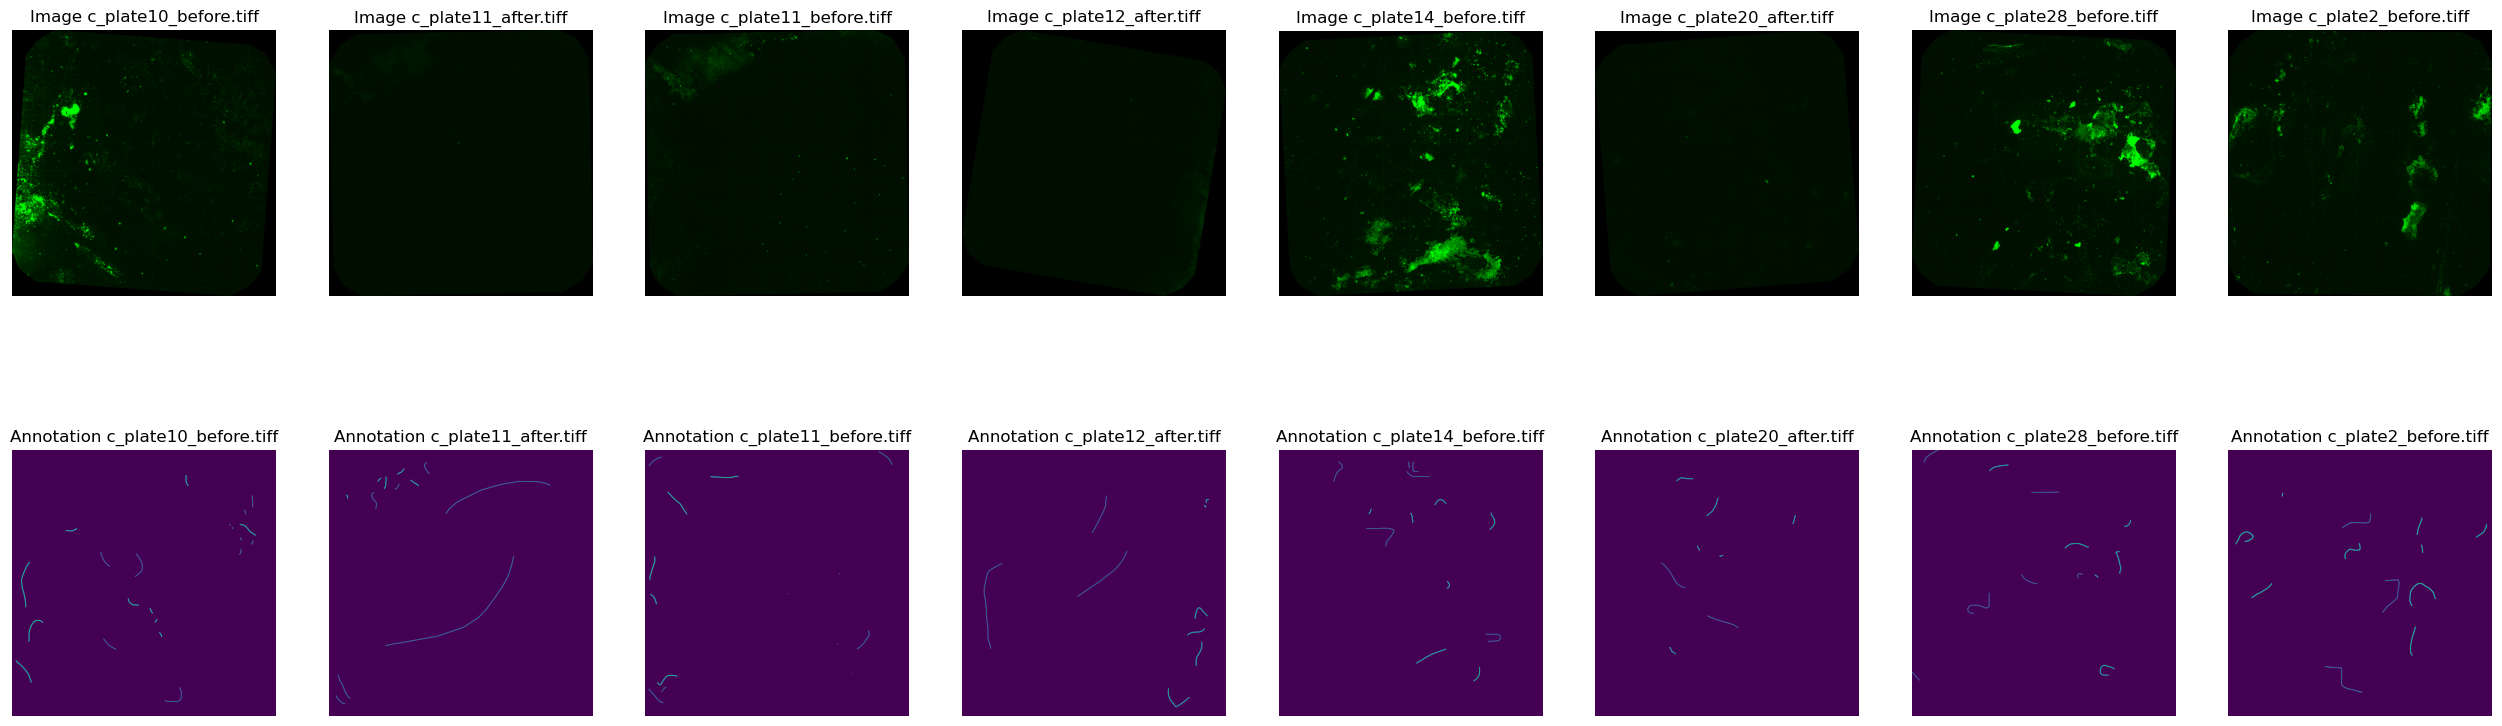

In [18]:
# Get the list of file names in the image and mask folder
image_file_list = [file_path.name for file_path in image_folder.glob("*.tiff")]
masks_file_list = [file_path.name for file_path in masks_folder.glob("*.tiff")]

# Ensure the masks folder has the same number of files as the images folder

assert len(image_file_list) == len(masks_file_list), "Number of images and masks must be the same."

# Show images and corresponding masks side by side
num_images = len(image_file_list)
fig, axs = plt.subplots(2, num_images, figsize=(4 * num_images, 10))

for i, (image_filename, mask_filename) in enumerate(zip(image_file_list, masks_file_list)):
    # Plot the image
    image = imread(os.path.join(image_folder, image_filename))
    axs[0, i].imshow(image)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Image {image_filename}")

    # Plot the corresponding mask
    mask = imread(os.path.join(masks_folder, mask_filename))
    axs[1, i].imshow(mask, cmap='viridis')  # Use cmap='viridis' for multinary masks
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Annotation {mask_filename}")

plt.show()


## Training
If the folders are setup properly, we can pass the folders to the training.

In [5]:
# setup classifer and where it should be saved
cl_filename = "test_object_segmenter_from_folders.cl"
apoc.erase_classifier(cl_filename)
segmenter = apoc.ObjectSegmenter(opencl_filename=cl_filename)

# setup feature set used for training
features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = image_folder, 
    ground_truth = masks_folder)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6642 but corresponding boolean dimension is 4935006

## Prediction
After the training, we can apply the classifier to all images in the image folder. The following line reloads the classifier from disk. In that way we can ensure that it was stored correctly.

In [5]:
segmenter = apoc.ObjectSegmenter(opencl_filename=cl_filename)

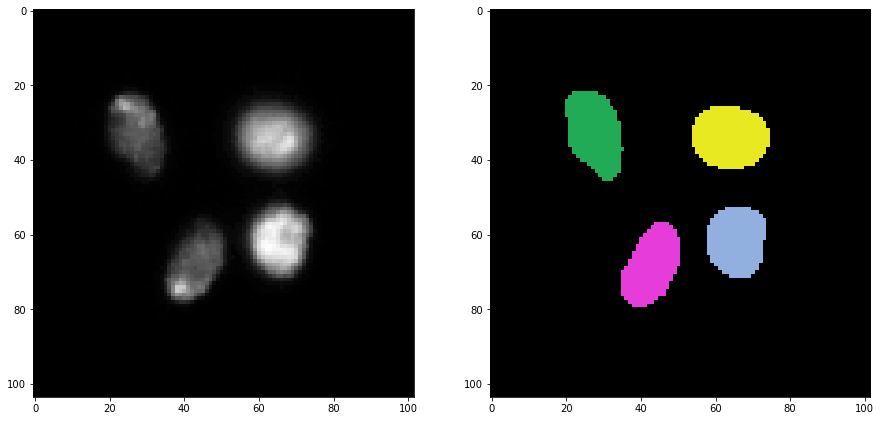

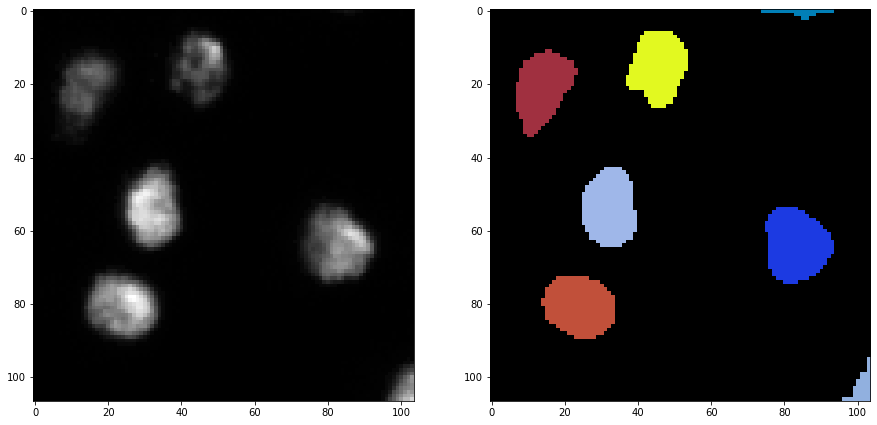

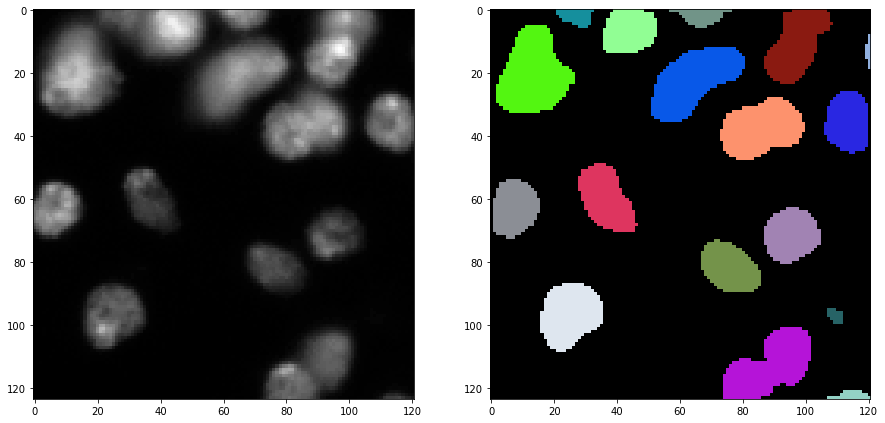

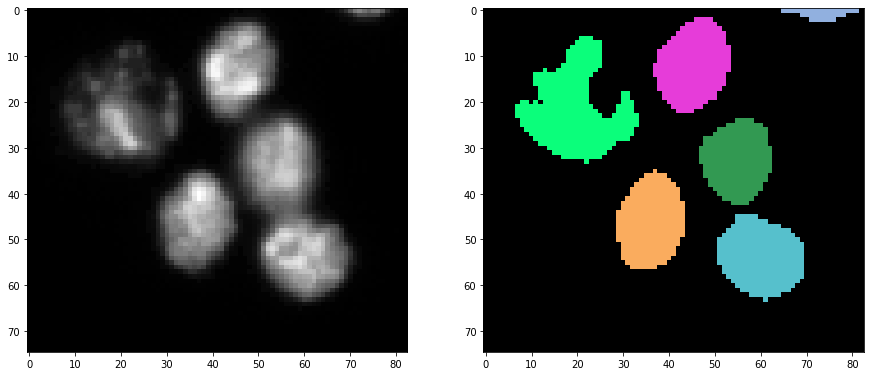

In [6]:
# show all images
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 2, figsize=(15,15))
    
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    plt.show()